In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/titanic_train.csv')

# Display the first few rows of the dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this step, let's check the summary of the DataFrame, including the count of non-null entries, column data types, and memory usage. It's important to have a holistic understanding about the types of data and missing values that we're going to deal with during the data analysis process.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The .info() method revealed that there are missing values in 'Age', 'Cabin', and 'Embarked' columns. Now, let's see the percentage of missing data in each column. It will help us later when we have to handle missing data.

To calculate it, I'll find the sum of all null values in a column, divide by the total number of rows and multiply by 100 to get the percentage.

In [3]:
(data.isnull().sum() / data.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Looking at the result of our calculation, we can see that approximately 77.1% of 'Cabin' data, 19.9% of 'Age' data, and 0.22% of 'Embarked' data are missing.

As a next step, let's perform a statistical summary of the dataframe using .describe() method. This will provide descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the summary statistics, we can see various things like the average age of passengers (29.7 years), the oldest passenger was 80, the youngest was around 5 months old (0.42 * 12 months ~= 5 months). Also, the average fare was approximately 32.2 with the maximum fare being around 512.3.

For our next step, let's investigate the relationship between survival and other variables. First, let's see how many people survived and how many didn't. We will use the .value_counts() function from pandas. This will provide a high-level overview of the survival distribution in the dataset.

In [5]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the output, we learned that out of 891 passengers in the dataset, only about 342 survived which is around 38.4% of the total. Now let's examine survival distribution by sex. This will give us some insight into one of the factors (gender) that may have played a part in the survival of passengers. 

Plotting the result will make the distribution more visible. We will use the seaborn library for this. If it's not available in the current environment, it needs to be installed. If not, the data will be grouped and displayed.

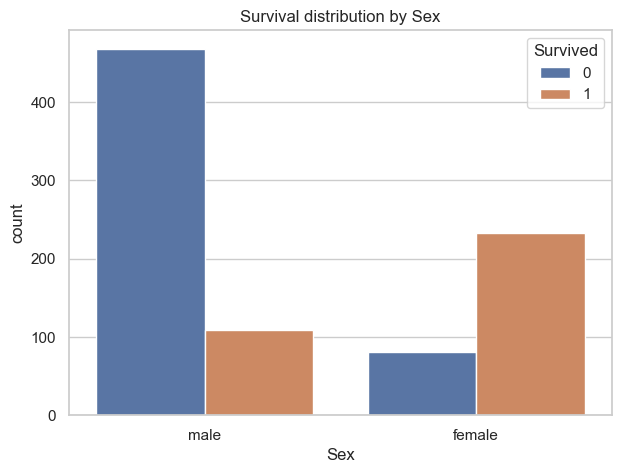

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the overall aesthetic.
sns.set(style="whitegrid")

plt.figure(figsize=(7,5))
# Countplot
ax = sns.countplot(x='Sex', hue='Survived', data=data)

plt.title('Survival distribution by Sex')
plt.show()